In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as count

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir(r'/content/gdrive/MyDrive/Нефть')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
test = pd.read_csv('oil_test.csv')
train = pd.read_csv('train_oil.csv')

In [ ]:
test.isna().sum()

Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name                         8
Tectonic regime                    0
Latitude                          13
Longitude                         16
Operator company                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

In [ ]:
train.isna().sum()

Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

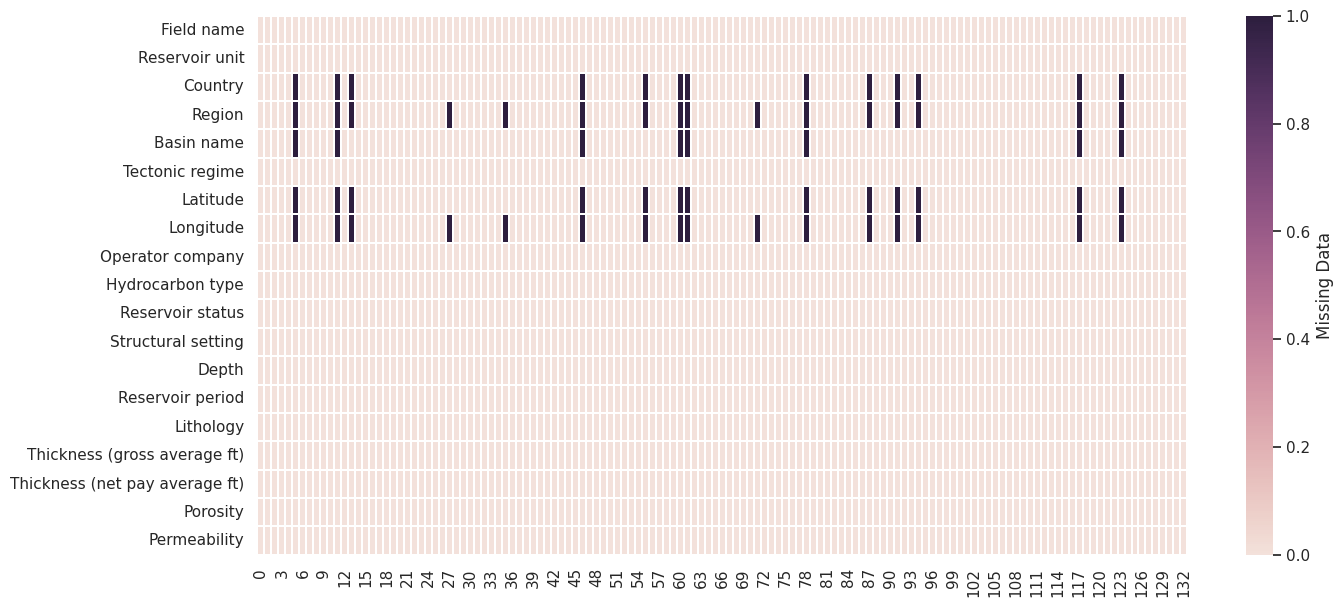

In [ ]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(test.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [ ]:
train.isnull().sum()

Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

# Обработка данных

In [ ]:
fi = 10

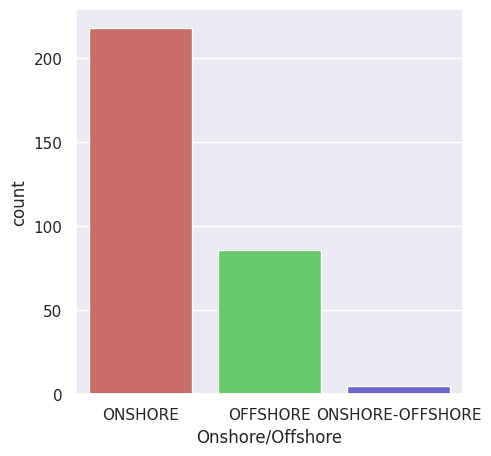

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
y_data = pd.DataFrame(train['Onshore/Offshore'])
sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

In [ ]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
cols_with_slash = []
for i in range(train.shape[1]):
    for j in np.array(train.iloc[:, i]):
        if '/' in str(j):
            cols_with_slash.append(train.iloc[:, i].name)
            break
print(cols_with_slash)

['Reservoir unit', 'Country', 'Basin name', 'Tectonic regime', 'Operator company', 'Structural setting']


In [ ]:
obj_cols = []
for i in range(train.shape[1]):
    if train.iloc[:, i].dtype == 'object':
        obj_cols.append(train.iloc[:, i].name)
obj_cols

['Field name',
 'Reservoir unit',
 'Country',
 'Region',
 'Basin name',
 'Tectonic regime',
 'Operator company',
 'Onshore/Offshore',
 'Hydrocarbon type',
 'Reservoir status',
 'Structural setting',
 'Reservoir period',
 'Lithology']

In [ ]:
num_cols = []
for i in range(train.shape[1]):
    if train.iloc[:, i].dtype != 'object':
        num_cols.append(train.iloc[:, i].name)
num_cols

['Latitude',
 'Longitude',
 'Depth',
 'Thickness (gross average ft)',
 'Thickness (net pay average ft)',
 'Porosity',
 'Permeability']

In [ ]:
obj_cols_without_slash = pd.Index(set(obj_cols) - set(cols_with_slash))
train[obj_cols_without_slash]

,Reservoir period,Lithology,Field name,Hydrocarbon type,Region,Onshore/Offshore,Reservoir status
0,CARBONIFEROUS,SANDSTONE,ZHIRNOV,OIL,FORMER SOVIET UNION,ONSHORE,DECLINING PRODUCTION
1,PALEOGENE,SANDSTONE,LAGOA PARDA,OIL,LATIN AMERICA,ONSHORE,NEARLY DEPLETED
2,JURASSIC,LIMESTONE,ABQAIQ,OIL,MIDDLE EAST,ONSHORE,REJUVENATING
3,JURASSIC,SANDSTONE,MURCHISON,OIL,EUROPE,OFFSHORE,NEARLY DEPLETED
4,DEVONIAN,DOLOMITE,WEST PEMBINA,OIL,NORTH AMERICA,ONSHORE,UNKNOWN
...,...,...,...,...,...,...,...
304,JURASSIC-CRETACEOUS,SANDSTONE,HIDES,GAS-CONDENSATE,FAR EAST,ONSHORE,CONTINUING DEVELOPMENT
305,JURASSIC,SANDSTONE,DRAKE POINT,GAS,NORTH AMERICA,ONSHORE,UNDEVELOPED
306,PALEOGENE,SANDSTONE,ALTAMONT-BLUEBELL,OIL,NORTH AMERICA,ONSHORE,MATURE PRODUCTION
307,CRETACEOUS,SANDSTONE,BELL CREEK,OIL,NORTH AMERICA,ONSHORE,NEARLY DEPLETED


In [ ]:
norm_cols = list(filter(lambda x: train.shape[0] / len(count(train[x])) > fi, obj_cols_without_slash))
print(norm_cols)

['Reservoir period', 'Lithology', 'Hydrocarbon type', 'Region', 'Onshore/Offshore', 'Reservoir status']


In [ ]:
def split_elements_with_slash(input_list):
    result_list = []

    for item in input_list:
        if '/' in item:
            result_list.extend(item.split('/'))
        else:
            result_list.append(item)

    return result_list

In [ ]:
norm_cols_with_slash = list(filter(lambda x: train.shape[0] / len(count(split_elements_with_slash(np.array(train[x], dtype='str')))) > fi, cols_with_slash))
norm_cols_with_slash

['Tectonic regime', 'Structural setting']

In [ ]:
df_train = train[norm_cols + norm_cols_with_slash + num_cols].copy()
df_train

,Reservoir period,Lithology,Hydrocarbon type,Region,Onshore/Offshore,Reservoir status,Tectonic regime,Structural setting,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,CARBONIFEROUS,SANDSTONE,OIL,FORMER SOVIET UNION,ONSHORE,DECLINING PRODUCTION,COMPRESSION/EVAPORITE,FORELAND,51.0000,44.8042,1870,262.0,33.0,24.0,30.0
1,PALEOGENE,SANDSTONE,OIL,LATIN AMERICA,ONSHORE,NEARLY DEPLETED,EXTENSION,PASSIVE MARGIN,-19.6017,-39.8332,4843,2133.0,72.0,23.0,350.0
2,JURASSIC,LIMESTONE,OIL,MIDDLE EAST,ONSHORE,REJUVENATING,COMPRESSION/EVAPORITE,FORELAND,26.0800,49.8100,6050,250.0,184.0,21.0,410.0
3,JURASSIC,SANDSTONE,OIL,EUROPE,OFFSHORE,NEARLY DEPLETED,EXTENSION,RIFT,61.3833,1.7500,8988,425.0,300.0,22.0,750.0
4,DEVONIAN,DOLOMITE,OIL,NORTH AMERICA,ONSHORE,UNKNOWN,COMPRESSION,FORELAND,53.2287,-115.8008,9306,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,JURASSIC-CRETACEOUS,SANDSTONE,GAS-CONDENSATE,FAR EAST,ONSHORE,CONTINUING DEVELOPMENT,COMPRESSION,THRUST,-6.0136,142.8409,9905,490.0,240.0,10.0,100.0
305,JURASSIC,SANDSTONE,GAS,NORTH AMERICA,ONSHORE,UNDEVELOPED,COMPRESSION/EVAPORITE/EXTENSION/LINKED,FORELAND,76.4462,-108.9172,3390,100.0,71.0,20.0,566.0
306,PALEOGENE,SANDSTONE,OIL,NORTH AMERICA,ONSHORE,MATURE PRODUCTION,COMPRESSION,FORELAND,40.3000,-110.2100,15250,8000.0,575.0,5.0,0.1
307,CRETACEOUS,SANDSTONE,OIL,NORTH AMERICA,ONSHORE,NEARLY DEPLETED,COMPRESSION,FORELAND,45.1039,-105.0967,4300,45.0,23.0,28.5,2250.0


In [ ]:
cols_with_none = []
for i in range(df_train.shape[1]):
    if df_train.iloc[:, i].isna().sum():
        cols_with_none.append(df_train.iloc[:, i].name)
cols_with_none

['Region', 'Latitude', 'Longitude']

In [ ]:
country = sorted(count(df_train['Region']).items(), key=lambda x: x[-1])[-1][0]
df_train['Region'].fillna(country, inplace=True)

In [ ]:
df_train.isna().sum()

Reservoir period                   0
Lithology                          0
Hydrocarbon type                   0
Region                             0
Onshore/Offshore                   0
Reservoir status                   0
Tectonic regime                    0
Structural setting                 0
Latitude                          27
Longitude                         30
Depth                              0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

In [ ]:
df_train['Latitude'] = df_train['Latitude'].interpolate(method='polynomial', order=2)
df_train['Longitude'] = df_train['Longitude'].interpolate(method='polynomial', order=2)

In [ ]:
df_train.isna().sum()

Reservoir period                  0
Lithology                         0
Hydrocarbon type                  0
Region                            0
Onshore/Offshore                  0
Reservoir status                  0
Tectonic regime                   0
Structural setting                0
Latitude                          0
Longitude                         0
Depth                             0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

# Категоризация признаков и балансировка классов


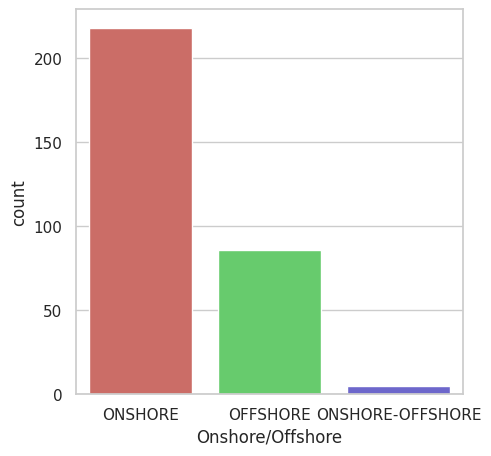

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(df_train['Onshore/Offshore'])
sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
for i in norm_cols:
    df_train.loc[:, i] = labelencoder.fit_transform(df_train.loc[:, i])

<ipython-input-688-5d005d57a7b7>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.loc[:, i] = labelencoder.fit_transform(df_train.loc[:, i])
<ipython-input-688-5d005d57a7b7>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.loc[:, i] = labelencoder.fit_transform(df_train.loc[:, i])
<ipython-input-688-5d005d57a7b7>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newva

In [ ]:
for m in norm_cols_with_slash:
    unique_values = set('/'.join(df_train[m]).split('/'))
    for value in unique_values:
        df_train[value] = df_train[m].apply(lambda x: value in x).astype(int)
    df_train.drop(m, axis=1, inplace=True)

In [ ]:
x, y = df_train.drop(['Onshore/Offshore'], axis=1), df_train['Onshore/Offshore']
ros = RandomOverSampler()

# Применение увеличения выборки к данным
x_resampled, y_resampled = ros.fit_resample(x, y)

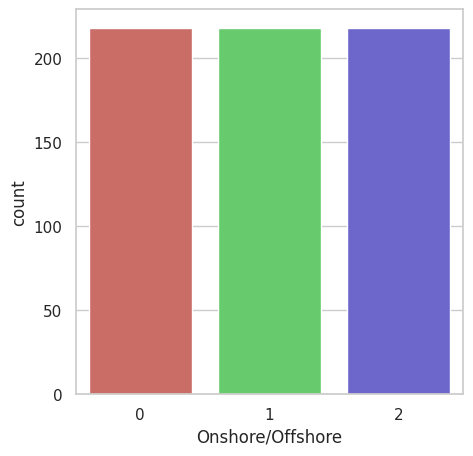

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(y_resampled)
sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

# Удаление колонок при обучении

In [ ]:
norm_cols.remove('Onshore/Offshore')
df_test = test[norm_cols + norm_cols_with_slash + num_cols].copy()
df_test

,Reservoir period,Lithology,Hydrocarbon type,Region,Reservoir status,Tectonic regime,Structural setting,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,CRETACEOUS,SANDSTONE,GAS-CONDENSATE,AFRICA,MATURE PRODUCTION,EXTENSION,RIFT,29.7422,28.4925,10282,745.0,144.0,10.0,8.0
1,NEOGENE,SANDSTONE,GAS,AFRICA,DECLINING PRODUCTION,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,WRENCH/DELTA,31.4382,31.3616,10499,509.0,410.0,20.0,300.0
2,CARBONIFEROUS,LIMESTONE,OIL,FORMER SOVIET UNION,DEVELOPING,COMPRESSION/EVAPORITE,SUB-SALT/FORELAND,48.4740,57.6667,6000,300.0,105.0,10.0,20.0
3,JURASSIC,SANDSTONE,OIL,EUROPE,NEARLY DEPLETED,INVERSION/COMPRESSION/EXTENSION,RIFT,60.7833,1.7333,9790,886.0,344.0,17.0,500.0
4,PALEOGENE,SANDSTONE,OIL,FAR EAST,MATURE PRODUCTION,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,WRENCH/RIFT,21.6000,72.9167,2950,670.0,0.0,21.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,ORDOVICIAN,DOLOMITE,OIL,FAR EAST,NEARLY DEPLETED,EXTENSION,RIFT,37.9167,118.4333,5970,560.0,82.0,2.5,8.4
129,NEOGENE,THINLY-BEDDED SANDSTONE,OIL,NORTH AMERICA,NEARLY DEPLETED,COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,WRENCH/FOREARC,35.0461,-119.1904,11100,200.0,150.0,20.0,75.0
130,PALEOGENE,SANDSTONE,OIL,FAR EAST,MATURE PRODUCTION,EXTENSION,RIFT,38.2100,117.0600,5384,230.0,69.0,26.7,1872.0
131,PALEOGENE,SANDSTONE,OIL,FAR EAST,DECLINING PRODUCTION,EXTENSION,RIFT,38.2100,117.0600,4721,164.0,62.0,23.2,121.0


In [ ]:
country_test = sorted(count(df_test['Region']).items(), key=lambda x: x[-1])[-1][0]
df_test['Region'].fillna(country_test, inplace=True)

In [ ]:
df_test['Latitude'] = df_test['Latitude'].interpolate(method='polynomial', order=2)
df_test['Longitude'] = df_test['Longitude'].interpolate(method='polynomial', order=2)

In [ ]:
df_test.isna().sum()

Reservoir period                  0
Lithology                         0
Hydrocarbon type                  0
Region                            0
Reservoir status                  0
Tectonic regime                   0
Structural setting                0
Latitude                          0
Longitude                         0
Depth                             0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

In [ ]:
for i in norm_cols:
    df_test.loc[:, i] = labelencoder.fit_transform(df_test.loc[:, i])

for m in norm_cols_with_slash:
    unique_values = set('/'.join(df_test[m]).strip().split('/'))
    for value in unique_values:
        df_test[value] = df_test[m].apply(lambda x: value in x).astype(int)
    df_test.drop(m, axis=1, inplace=True)

<ipython-input-696-2b8d6ddf51ea>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test.loc[:, i] = labelencoder.fit_transform(df_test.loc[:, i])
<ipython-input-696-2b8d6ddf51ea>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test.loc[:, i] = labelencoder.fit_transform(df_test.loc[:, i])
<ipython-input-696-2b8d6ddf51ea>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` 

In [ ]:
false_columns = pd.Index(set(np.array(x.columns)) - set(np.array(df_test.columns)))
false_columns

Index(['REACTIVATION'], dtype='object')

# Обучение модели

In [ ]:
x_resampled.drop(false_columns, axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x_resampled[sorted(x_resampled.columns)], y_resampled, test_size=0.2)

print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Train dataset size: {x_test.shape}, {y_test.shape}')

Train dataset size: (523, 39), (523,)
Train dataset size: (131, 39), (131,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Создадим модель дерева решений
model = DecisionTreeClassifier()

# обучение модели
model.fit(x_train, y_train)

# предсказание ответов для тестовой выборки
answers_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(f'Accuracy: {accuracy_score(y_test, answers_pred)}')

Accuracy: 0.9541984732824428


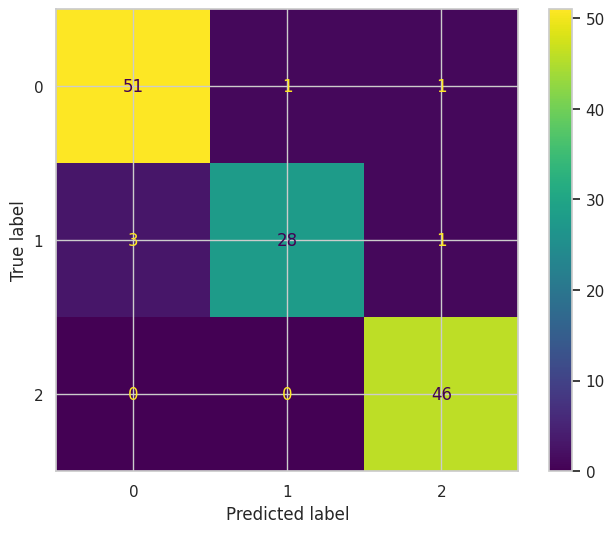

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, answers_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)

display.plot(ax=ax)

In [ ]:
model_full = DecisionTreeClassifier()

# обучение модели
model_full.fit(x_resampled[sorted(x_resampled.columns)], y_resampled)

DecisionTreeClassifier()

# Предсказание на тестовой выборке

In [ ]:
df_test.drop([''], axis=1, inplace=True)

In [ ]:
result = model_full.predict(df_test[sorted(df_test.columns)])

In [ ]:
count(train['Onshore/Offshore'])
dct = {1: 'ONSHORE', 0: 'OFFSHORE', 2: 'ONSHORE-OFFSHORE'}

In [ ]:
data = pd.DataFrame(map(lambda x: dct[x], result), columns=['Onshore/Offshore'])

In [ ]:
count(data['Onshore/Offshore'])

Counter({'ONSHORE': 91, 'OFFSHORE': 40, 'ONSHORE-OFFSHORE': 2})

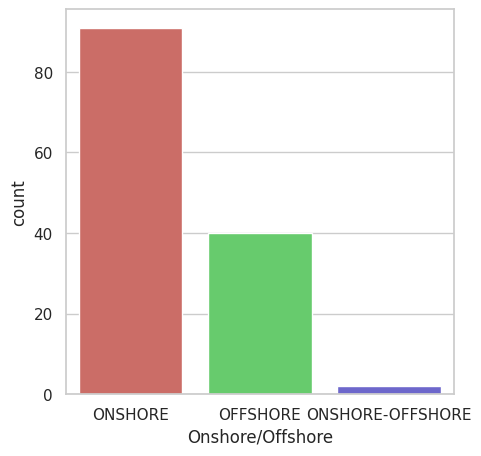

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(data['Onshore/Offshore'])
sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

In [ ]:
#data.to_csv('predict.csv')